In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [7]:
df=pd.read_csv('kyphosis.csv')

In [8]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('Kyphosis',axis=1)

In [11]:
y=df.Kyphosis

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree=DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
predictions=dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.87      0.65      0.74        20
     present       0.30      0.60      0.40         5

    accuracy                           0.64        25
   macro avg       0.58      0.62      0.57        25
weighted avg       0.75      0.64      0.67        25



In [25]:
confusion_matrix(y_test,predictions)

array([[13,  7],
       [ 2,  3]], dtype=int64)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc=RandomForestClassifier(n_estimators=190)

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rfc_pred=rfc.predict(X_test)

In [72]:
print(confusion_matrix(y_test,rfc_pred))

[[17  3]
 [ 4  1]]


In [68]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.81      0.85      0.83        20
     present       0.25      0.20      0.22         5

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.70      0.72      0.71        25



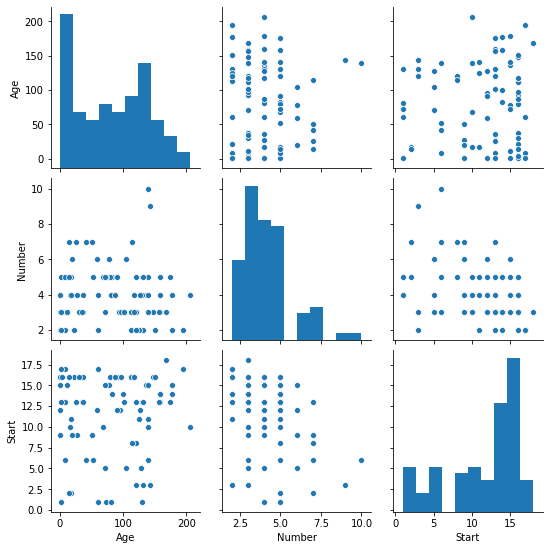

In [75]:
sns.pairplot(df)

In [76]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64